In [8]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
from numpyro.infer.initialization import init_to_median, init_to_mean
from jax import random, vmap
import jax.numpy as jnp
from numpyro.diagnostics import *
import math
import numpy as np
from numpyro.diagnostics import summary


## Comvergence diagnostics and performance
Here, we compare performance and convergence for the different BLR models. We vary:
1. Dimensionality: full dimensionality vs reduced dimensionality
2. Prior: Horseshoe vs Normal

In [105]:
# helper
def plot_diagnostics(mcmc_results_dict):
    summary_dict = summary(mcmc_results_dict['samples'], group_by_chain=False)
    fig, ax = plt.subplots(1, 2, figsize=(6, 4))
    ax[0].hist(summary_dict['beta']['n_eff'], bins=10);
    ax[1].hist(summary_dict['beta']['r_hat'], bins=10);
    print('Nr draws:', mcmc_results_dict['samples']['beta'].shape[0])
    print('Nr dimensions', mcmc_results_dict['samples']['beta'].shape[1])
    print('Median r_hat:', np.mean(summary_dict['beta']['r_hat']))
    print('Median n_eff:', np.mean(summary_dict['beta']['n_eff']))
    return summary_dict

## a) Full dim + Normal prior 

In [106]:
with open('results/mcmc/results_dna_llama3:70b_srgtlabels=model_response_prior=normal.p', 'rb') as handle:
    results_model_normal = pickle.load(handle)

# print accuracies
results_model_normal['train_acc'], results_model_normal['test_acc_surrogate_labels'], results_model_normal['test_acc_human_labels']

(1.0, 0.9132149901380671, 0.814595660749507)

Nr draws: 10000
Nr dimensions 8192
Median r_hat: 0.99994564
Median n_eff: 22112.61012761256


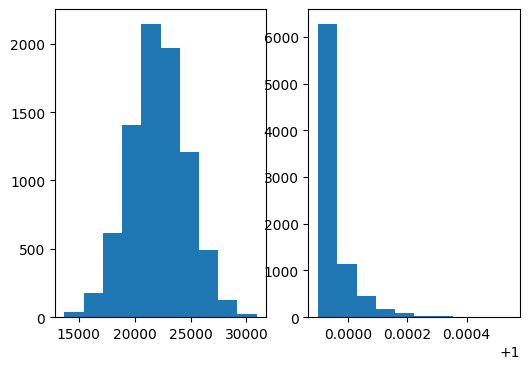

In [107]:
summary_dict = plot_diagnostics(results_model_normal)

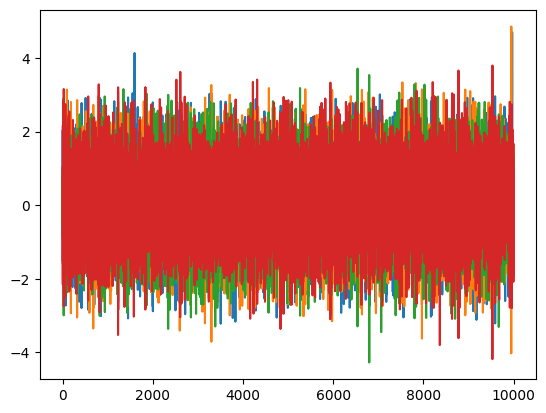

In [108]:
# gaussian prior chains look fine
plt.plot(results_model_normal['samples']['beta'][:, 0])
plt.plot(results_model_normal['samples']['beta'][:, 1])
plt.plot(results_model_normal['samples']['beta'][:, 2])
plt.plot(results_model_normal['samples']['beta'][:, 3])

## b) Full dim + Horseshoe prior 

In [109]:
with open('results/mcmc/results_dna_llama3:70b_srgtlabels=model_response_prior=horseshoe_D=full.p', 'rb') as handle:
    results_model_horseshoe = pickle.load(handle)

In [110]:
results_model_horseshoe['train_acc'], results_model_horseshoe['test_acc_surrogate_labels'], results_model_horseshoe['test_acc_human_labels']

(1.0, 0.903353057199211, 0.8284023668639053)

Nr draws: 10000
Nr dimensions 8192
Median r_hat: 1.0942819
Median n_eff: 54.946867854281635


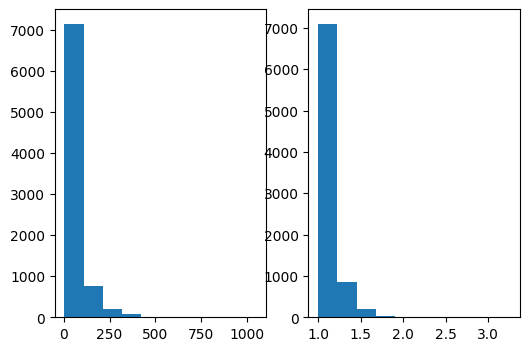

In [113]:
summary_dict = plot_diagnostics(results_model_horseshoe)

## c ) 500 dimensions + normal prior


In [115]:
with open('results/mcmc/results_dna_llama3:70b_srgtlabels=model_response_prior=normal_D=500.p', 'rb') as handle:
    results_model_normal_500dim = pickle.load(handle)
    
# print accuracies
results_model_normal_500dim['train_acc'], results_model_normal_500dim['test_acc_surrogate_labels'], results_model_normal_500dim['test_acc_human_labels']

(1.0, 0.8796844181459567, 0.7652859960552268)

Nr draws: 10000
Nr dimensions 500
Median r_hat: 1.0000168
Median n_eff: 8008.401497799724


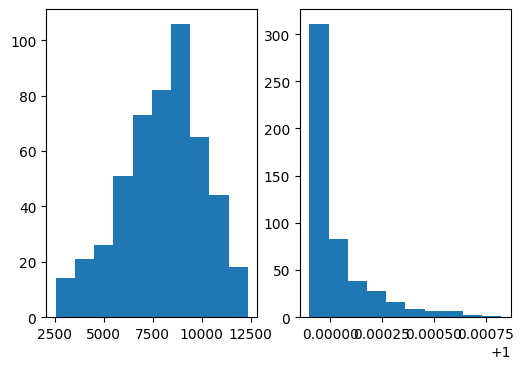

In [120]:
summary_dict = plot_diagnostics(results_model_normal_500dim)

## d) 500 dimensions + Horseshoe prior

In [121]:
with open('results/mcmc/results_dna_llama3:70b_srgtlabels=model_response_prior=horseshoe_D=500.p', 'rb') as handle:
    results_model_horseshoe_500dim = pickle.load(handle)
results_model_horseshoe_500dim['train_acc'], results_model_horseshoe_500dim['test_acc_surrogate_labels'], results_model_horseshoe_500dim['test_acc_human_labels']

(0.9644268774703557, 0.8974358974358975, 0.7988165680473372)

Nr draws: 10000
Nr dimensions 500
Median r_hat: 1.0001448
Median n_eff: 6181.719460389443


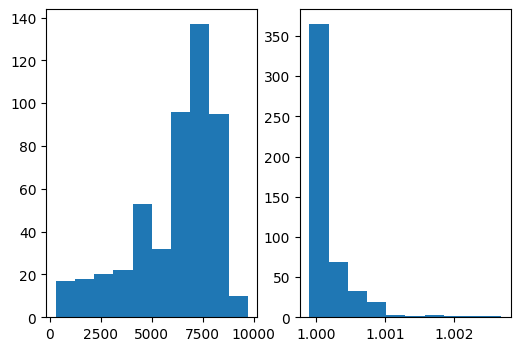

In [123]:
plot_diagnostics(results_model_horseshoe_500dim);

## e) 100 dimensions + Normal prior

In [127]:
with open('results/mcmc/results_dna_llama3:70b_srgtlabels=model_response_prior=normal_D=100.p', 'rb') as handle:
    results_model_normal_100dim = pickle.load(handle)
results_model_normal_100dim['train_acc'], results_model_normal_100dim['test_acc_surrogate_labels'], results_model_normal_100dim['test_acc_human_labels']

(0.9960474308300395, 0.8560157790927022, 0.757396449704142)

Nr draws: 10000
Nr dimensions 100
Median r_hat: 1.0000048
Median n_eff: 6928.221109798868


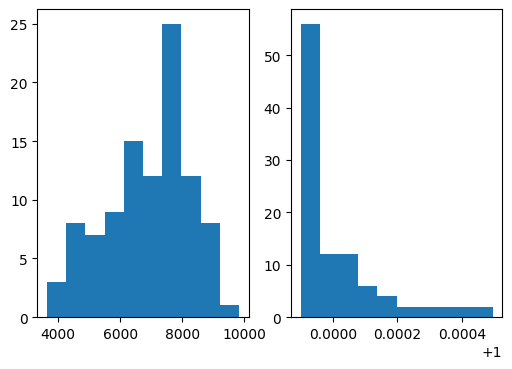

In [143]:
summary_dict_normal_100dim =  plot_diagnostics(results_model_normal_100dim);

<BarContainer object of 100 artists>

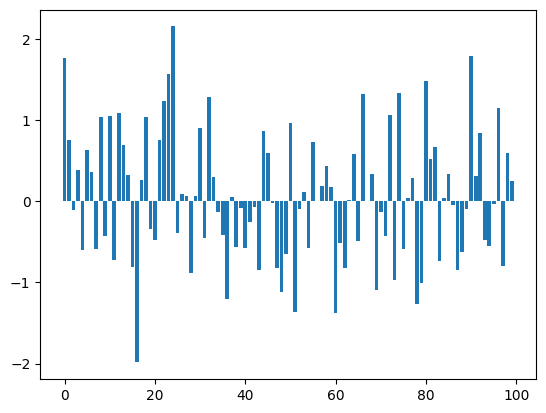

In [144]:
plt.bar(x = np.arange(100), height=summary_dict_normal_100dim['beta']['mean'])

## f) 100 dimensions + Horseshoe prior

In [129]:
with open('results/mcmc/results_dna_llama3:70b_srgtlabels=model_response_prior=horseshoe_D=100.p', 'rb') as handle:
    results_model_horseshoe_100dim = pickle.load(handle)
results_model_horseshoe_100dim['train_acc'], results_model_horseshoe_100dim['test_acc_surrogate_labels'], results_model_horseshoe_100dim['test_acc_human_labels']

(0.9525691699604744, 0.9092702169625246, 0.7909270216962525)

Nr draws: 10000
Nr dimensions 100
Median r_hat: 1.000062
Median n_eff: 8080.369282502661


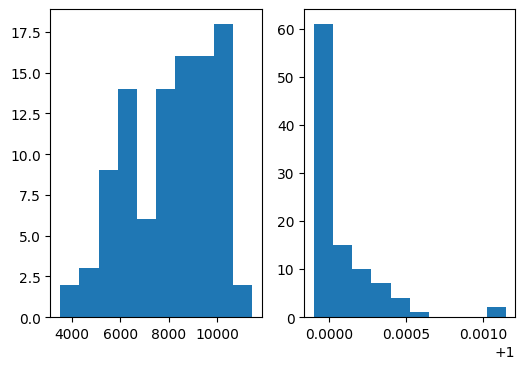

In [131]:
summary_dict = plot_diagnostics(results_model_horseshoe_100dim);

<BarContainer object of 100 artists>

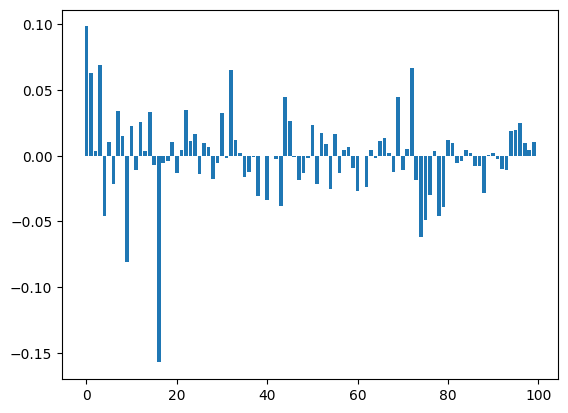

In [142]:
plt.bar(x = np.arange(100), height=summary_dict['beta']['mean'])

In [ ]:
def plot_diagnostics(mcmc_results_dict):
    summary_dict = summary(mcmc_results_dict['samples'], group_by_chain=False)
    fig, ax = plt.subplots(1, 2, figsize=(6, 4))
    ax[0].hist(summary_dict['beta']['n_eff'], bins=10);
    ax[1].hist(summary_dict['beta']['r_hat'], bins=10);
    print('Nr draws:', mcmc_results_dict['samples']['beta'].shape[0])
    print('Nr dimensions', mcmc_results_dict['samples']['beta'].shape[1])
    print('Median r_hat:', np.mean(summary_dict['beta']['r_hat']))
    print('Median n_eff:', np.mean(summary_dict['beta']['n_eff']))
    return summary_dict

Next idea:
- try with different dimensionalities?

## Debug summary
Why is n_eff so often larger than n?

--> Have manually debugged the numpyro code, dimensionalities are ok.

Maybe we are in the case mentioned here for the NUTS sampler?
https://mc-stan.org/docs/2_18/reference-manual/effective-sample-size-section.html

# Appendix
N_eff debug

In [ ]:
results_model_normal_lowdim['samples']['beta'].shape
# 10000 draws with 100 dims each 
# BUT! numpyro wants samples ``x``, where the first dimension of
# ``x`` is chain dimension and the second dimension of ``x`` is draw dimension.
# It is required that ``x.shape[0] >= 2`` and ``x.shape[1] >= 2``.

# in their code they do:
value_flat = np.reshape(value, (-1,) + value.shape[2:])

# [10000, 100] -> 10000 * 100

In [119]:
value = np.ones((10000, 100))
value_flat = np.reshape(value, (-1,) + value.shape[2:])
value_flat.shape

(1000000,)